# Differential Equations 2

Real life problems frequently involve more than one dependent variable. Fortunately little about our previous Runge-Kutta approach needs to change to handle these problems.

First, since we're using computers and we want to write flexible code, we'll turn our dependent variable into a list or array to account for the new term(s). 

Second, the function $f(\vec{r}, t)$ will now compute both/all the relevant equations and return the appropriate list/array.

Consider the simultaneous equations:

$$
\frac{dx}{dt} = xy -x , \qquad \frac{dy}{dt} = y- xy + \sin^2\omega t
$$

Perhaps beginning with previous code, write a program to solve these equations from $t=0$ to $t=10$ given $\omega = 1$, with $ x = y = 0$ at $t=0$. Now that we know fourth-order Runge-Kutta is only a few more lines of code than simpler methods, it should be our first choice going forward.

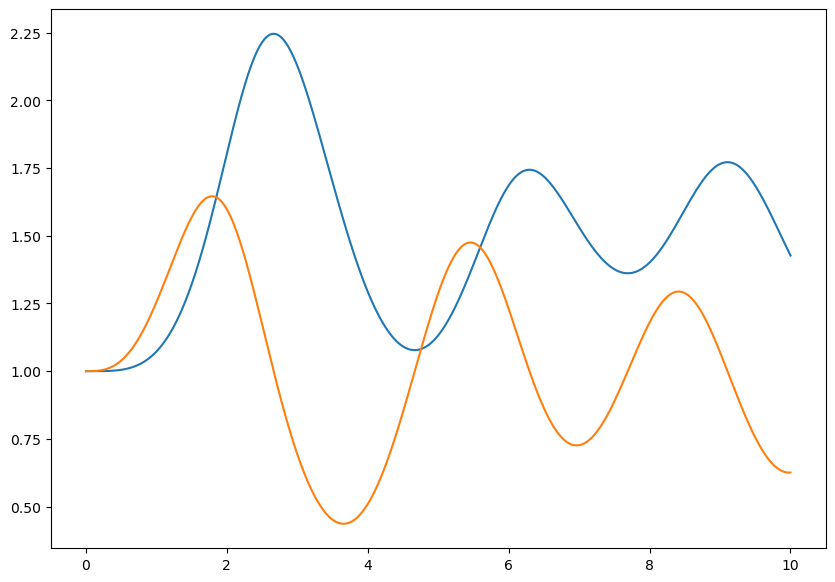

In [1]:
# code
import numpy as np
from matplotlib import pyplot as plt

def f(r,t):
    x = r[0]
    y = r[1]
    fx = x*y - x
    fy = y - x*y + (np.sin(1*t)) ** 2
    return (np.array([fx,fy],float))

start = 0
end = 10
steps = 1000
h = (end - start) / steps

tpoints = np.linspace(start,end,steps)
xarray = []
yarray = []
r = np.array([1,1],float)

for i in range(0,len(tpoints)):
    xarray.append(r[0])
    yarray.append(r[1])
    k1 = h*f(r,tpoints[i])
    k2 = h*f(r+k1/2, tpoints[i] + h/2)
    k3 = h*f(r+k2/2, tpoints[i] + h/2)
    k4 = h*f(r+k3, tpoints[i] + h)
    r = r + (k1+2*k2+2*k3+k4)/6

fig1 = plt.figure(figsize = (10,7))
graph = fig1.add_subplot(111)
graph.plot(tpoints,xarray)
graph.plot(tpoints,yarray)

## Second Order Differential Equations

Section 8.3 discussed a simple method for dealing with second order differential equations: create a system of equations where the first order equation is one of the equations.

Example 8.6 defines a new function $d\theta \over dt$$ = \omega$ in order to turn the second order equation $d^2 \theta \over dt^2 $$= - \frac{g}{l} \sin \theta$ into two first order equations for $\theta$ and $\omega$. The function to use for $f(\vec{r}, t)$ and some constants are given as well. I've copied over the given code for you. Complete the exercise by adding the Runge-Kutta code and plotting.

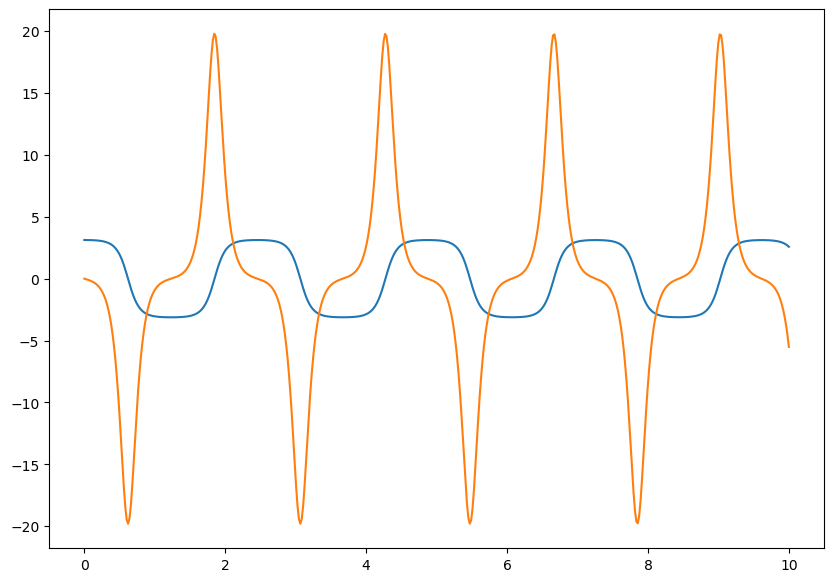

In [34]:
g = 9.81
l = 0.1

start = 0
end = 10
steps = 500
h = (end - start) / steps

tpoints = np.linspace(start,end,steps)
thetas = []
omegas = []

def f(r,t):
    theta = r[0]
    omega = r[1]
    d_theta = omega
    d_omega = - (g / l) * np.sin(theta)
    return np.array([d_theta, d_omega], float)
  
    # runge-kutta here (go go gadget copy and paste)
r = np.array([np.radians(179),0],float)

for i in range(0,len(tpoints)):
    thetas.append(r[0])
    omegas.append(r[1])
    k1 = h*f(r,tpoints[i])
    k2 = h*f(r+k1/2, tpoints[i] + h/2)
    k3 = h*f(r+k2/2, tpoints[i] + h/2)
    k4 = h*f(r+k3, tpoints[i] + h)
    r = r + (k1+2*k2+2*k3+k4)/6
    


fig1 = plt.figure(figsize = (10,7))
graph = fig1.add_subplot(111)
graph.plot(tpoints,thetas)
graph.plot(tpoints,omegas)
#graph.plot(omegas,thetas)